<div style="text-align: center;">

## **Trabalho Final – Programação Estatística🔥**

### **Universidade Federal de São Carlos**

<br>

**Professor:** *Thiago Rodrigo Ramos*  

**Integrantes:**  
Bárbara Moreira  
Eduardo Zanin  
Gabriel Nery Brasil  
Paulo Roberto Salles Neto  

<br>

**Data:** 07/12/2025

</div>


##### Importando e intalando pacotes

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.stats import nbinom
from math import log

### Exercício 1

&nbsp;&nbsp;&nbsp;&nbsp; Uma **Equação Diferencial Estocástica (SDE)** descreve a evolução de uma variável ao longo do tempo sob a ação conjunta de uma parte determinística e uma parte aleatória. A forma geral de uma SDE é

$$dX_t = a(X_t)\,dt + b(X_t)\,dW_t,$$

onde $W_t$ é um processo de Wiener (ou movimento browniano). O termo $a(X_t)$ é chamado de *drift* (ou deriva) e representa a tendência média do processo, enquanto $b(X_t)$ é o coeficiente de difusão, que controla a intensidade do ruído.

&nbsp;&nbsp;&nbsp;&nbsp; Como não é possível resolver analiticamente algumas SDEs, usamos métodos numéricos para aproximar suas trajetórias. O método mais simples é o **método de Euler–Maruyama**, que é a versão estocástica do método de Euler. Ele consiste em discretizar o tempo em passos de tamanho $\Delta t$ e aproximar a dinâmica por

$$X_{t+\Delta t} = X_t + a(X_t)\,\Delta t + b(X_t)\,\sqrt{\Delta t}\,Z_t,$$

onde $Z_t \sim \mathcal{N}(0,1)$ são variáveis normais independentes.


#### *Item a)*

&nbsp;&nbsp;&nbsp;&nbsp; Simule a trajetória de uma SDE com

$$a(X_t) = 0 \quad \text{e} \quad b(X_t) = 1,$$

ou seja,

$$
dX_t = dW_t.
$$

Essa equação descreve o **movimento browniano puro**.

&nbsp;&nbsp;&nbsp;&nbsp; Escolha um intervalo de tempo total $T > 0$ e divida-o em $n$ subintervalos igualmente espaçados. Defina o passo de tempo como

$$
\Delta t = \frac{T}{n},
$$

e simule numericamente a trajetória de $X_t$ no intervalo $t \in [0, T]$, partindo de $X_0 = 0$. Em seguida, produza um gráfico mostrando a evolução de $X_t$ ao longo do tempo para várias trajetórias diferentes.


In [ ]:
T = 1.0
n = 1000
m = 5
dt = T/n

def exponencial_inversao(lamb):
  valor = np.random.uniform()
  return (-1*np.log(valor))/lamb

def bernoulli(p):
  u = np.random.uniform()
  if u <= p:
    return 1
  else:
    return -1

def minha_normal():
  u = np.random.uniform()
  y = exponencial_inversao(1)
  while u > np.exp(-((y-1)**2)/2):
    u = np.random.uniform()
    y = exponencial_inversao(1)
  b = bernoulli(1/2)
  return b*y

In [ ]:
t = np.linspace(0.0,T,n+1)
X = np.zeros((m,n+1))
for j in range(m):
    for i in range(n):
        Z = minha_normal()
        X[j, i + 1] = X[j, i] + np.sqrt(dt) * Z

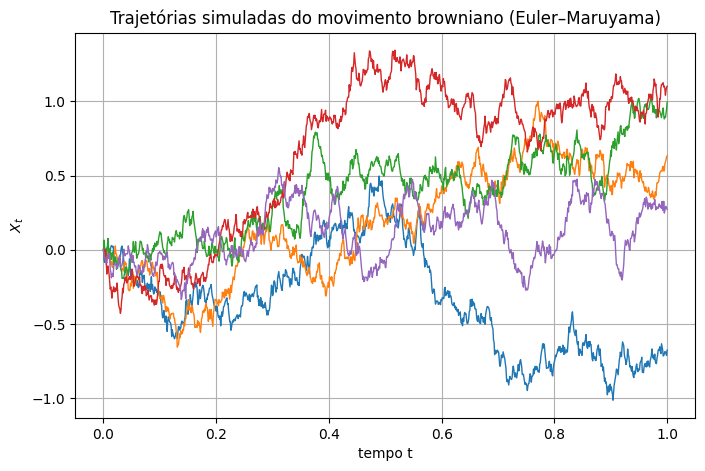

In [ ]:
plt.figure(figsize=(8, 5))

for j in range(m):
    plt.plot(t, X[j, :], linewidth=1)

plt.xlabel("tempo t")
plt.ylabel(r"$X_t$")
plt.title("Trajetórias simuladas do movimento browniano (Euler–Maruyama)")
plt.grid(True)
plt.show()

#### *Item b)*

&nbsp;&nbsp;&nbsp;&nbsp; Agora, modifique o termo de drift para que o processo seja guiado pelo *score* de uma mistura de duas distribuições normais:

$$
p(x) = \tfrac{1}{2} \mathcal{N}(-2, 1) + \tfrac{1}{2} \mathcal{N}(2, 1),
$$

e defina o *drift* como o gradiente do logaritmo dessa densidade:

$$
a(x) = \nabla_x \log p(x).
$$

Use $b(X_t) = 1$ como antes.

&nbsp;&nbsp;&nbsp;&nbsp; Simule o processo $X_t$ usando o método de Euler–Maruyama com o mesmo passo de tempo $\Delta t = T/n$, mas agora iniciando com

$$
X_0 \sim \mathcal{N}(0, 1).
$$

&nbsp;&nbsp;&nbsp;&nbsp; Gere diversas trajetórias independentes e, ao final da simulação (tempo $T$), plote o **histograma dos valores de $X_T$**.

&nbsp;&nbsp;&nbsp;&nbsp; Compare esse histograma com a forma da densidade alvo $p(x)$ e discuta como o termo de drift (o *score*) influencia a dinâmica em relação ao movimento browniano puro. Em seguida, analise também como a escolha dos parâmetros de simulação afeta o comportamento do processo: explique o efeito de diminuir ou aumentar o passo de tempo $\Delta t = T/n$ e como o tempo total de simulação $T$ influencia a convergência da distribuição de $X_T$ para a densidade alvo $p(x)$.

Função normal

* calcula a densidade da normal, utilizada para montar a mistura

In [ ]:
def normal_pdf(x, mu):
    return (1/np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / 2)

Dift Score da mistura $ p(x) $

- $ a(x) = \frac{d}{dx} \log p(x) $

- $ a(x) = \frac{p'(x)}{p(x)} $

A derivação analítica do score foi feita previamente e implementada diretamente na função `drift(x)`, na qual se computa numericamente o valor do score da mistura em cada ponto $ x $. Esse termo é então usado no método de Euler–Maruyama para atualizar o processo.


In [ ]:
def drift(x):
    p1 = normal_pdf(x, -2)
    p2 = normal_pdf(x,  2)

    p = 0.5*p1 + 0.5*p2
    p_deriv = -0.5*(x+2)*p1 - 0.5*(x-2)*p2

    return p_deriv / p

Apos os calculos no score a(x), implementa-se a simulação com os parametros, seguindo a mesma logica do item A.

In [ ]:
T = 1.0
n = 2000
dt = T/n
m = 5000

def minha_normal_vetor(m):
  u = np.random.uniform()
  y = exponencial_inversao(1)
  lista = []
  for i in range(m):
    while u > np.exp(-((y-1)**2)/2):
      u = np.random.uniform()
      y = exponencial_inversao(1)
    b = bernoulli(1/2)
    x = y*b
    lista.append(x)
  return np.array(lista)

X = np.zeros(m)
X = minha_normal_vetor(m)
for i in range(n):
    Z = minha_normal_vetor(m)
    X = X + drift(X)*dt + np.sqrt(dt)*Z

Histograma e Densidade Alvo

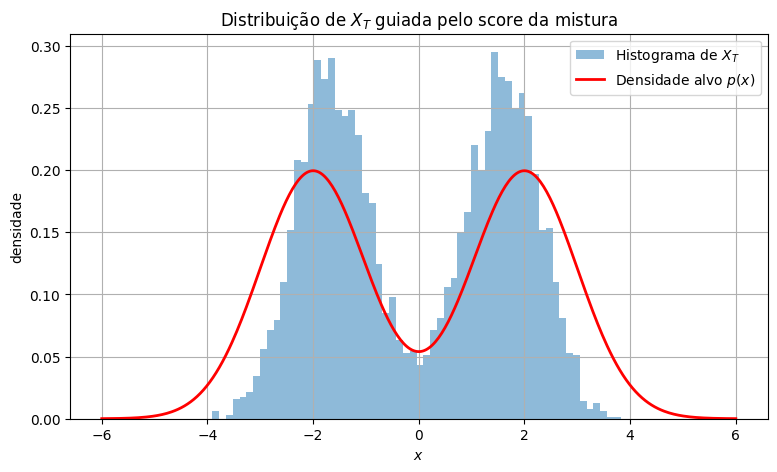

In [ ]:
xs = np.linspace(-6, 6, 400)
p_target = 0.5*normal_pdf(xs, -2) + 0.5*normal_pdf(xs, 2)

plt.figure(figsize=(9,5))

# histograma
plt.hist(X, bins=60, density=True, alpha=0.5, label="Histograma de $X_T$")

# densidade alvo
plt.plot(xs, p_target, 'r', lw=2, label="Densidade alvo $p(x)$")

plt.title("Distribuição de $X_T$ guiada pelo score da mistura")
plt.xlabel("$x$")
plt.ylabel("densidade")
plt.legend()
plt.grid(True)
plt.show()

### Exercício 2

&nbsp;&nbsp;&nbsp;&nbsp; Considere um modelo de Poisson para dados de contagem:

$$Y \sim \text{Poisson}(\theta), \qquad \theta \ge 0.$$

O parâmetro $\theta$ pode ser interpretado como a taxa de ocorrência (ou taxa de chegadas), e, nesse modelo, vale

$$\mathbb{E}[Y] = \operatorname{Var}(Y) = \theta.$$

&nbsp;&nbsp;&nbsp;&nbsp; Uma limitação importante desse modelo é que ele **não consegue representar sobredispersão**, isto é, situações em que a variância é maior que a média. Essa restrição ocorre porque o modelo de Poisson possui apenas um parâmetro livre.

&nbsp;&nbsp;&nbsp;&nbsp; Uma forma de contornar esse problema é assumir que o parâmetro $\theta$ também é aleatório, atribuindo-lhe uma distribuição **Gamma**:

$$\theta \sim \text{Gamma}(r,\theta),$$

onde $r > 0$ é o parâmetro de forma e $\theta > 0$ é o parâmetro de escala. O modelo resultante, ao marginalizar $\theta$, gera uma distribuição de $Y$ que é **Binomial Negativa**, a qual é capaz de modelar sobredispersão de forma natural.

#### *Item a)*

&nbsp;&nbsp;&nbsp;&nbsp; Mostre que, se
$$
Y \mid \Lambda = \lambda \sim \text{Poisson}(\lambda)
\qquad
\text{ e }
\qquad
\Lambda \sim \text{Gamma}(r, \theta)
$$
então a distribuição marginal de $Y$ é

$$Y \sim \text{BinNeg}(r, p),$$

com $p = \frac{1}{1+\theta}$. Em outras palavras, prove que

$$P(Y = k) = \int_0^\infty P(Y = k \mid \Lambda = \lambda)\, f_\Lambda(\lambda)\, d\lambda$$

resulta em

$$
P(Y = k) = \frac{\Gamma(k+r)}{k!\,\Gamma(r)} \, (1-p)^k \, (p)^r, \qquad k = 0,1,2,\dots
$$

onde

$$
P(Y = k \mid \Lambda = \lambda) = \frac{e^{-\lambda} \lambda^k}{k!}
\qquad
\text{ e }
\qquad
f_\Lambda(\lambda) = \frac{\lambda^{r-1} e^{-\lambda/\theta}}{\Gamma(r)\,\theta^r}.
$$

Apresente todos os passos da integração e justifique cada etapa.

Sejam as funções de densidade e de probabilidade:

$$
\begin{align*}
P(Y = k \mid \Lambda = \lambda) &= \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots \\
f_\Lambda(\lambda) &= \frac{\lambda^{r-1} e^{-\lambda / \theta}}{\Gamma(r) \theta^r}, \quad \lambda > 0,
\end{align*}
$$

Então:

$$
\begin{align*}
P(Y = k) &= \int_0^\infty \frac{e^{-\lambda} \lambda^k}{k!} \cdot \frac{\lambda^{r-1} e^{-\lambda / \theta}}{\Gamma(r) \theta^r} \, d\lambda \\
&= \frac{1}{k! \, \Gamma(r) \, \theta^r} \int_0^\infty \lambda^{k+r-1} e^{-\lambda \left(1 + \frac{1}{\theta}\right)} \, d\lambda.
\end{align*}
$$

Resolvendo a integral, nota-se que ela é proporcional a uma distribuição $Gamma[(k+r-1),( \frac{1+\theta}{\theta})]$:

$$
\int_0^\infty \lambda^{k+r-1} e^{-(\frac{1+\theta}{\theta}) \lambda} \, d\lambda = \frac{\theta^{k+r} \Gamma(k+r)}{(1+\theta)^{k+r}} \int_0^\infty \frac{(1+ \theta)^{k+r}}{\theta^{k+r} \Gamma(k+r)} \lambda^{k+r-1} e^{-(\frac{1+\theta}{\theta}) \lambda} \, d\lambda .
$$

$$
\int_0^\infty \lambda^{k+r-1} e^{-(\frac{1+\theta}{\theta}) \lambda} \, d\lambda = \frac{\theta^{k+r} \, \Gamma(k+r)}{(1+\theta)^{k+r}}
$$

$$
\begin{align*}
P(Y = k) &= \binom{k+r-1}{k} \cdot \frac{\theta^k}{(1+\theta)^{k+r}} \\
&= \binom{k+r-1}{k} \cdot \left(\frac{\theta}{1+\theta}\right)^k \cdot \left(\frac{1}{1+\theta}\right)^r , \hspace{0.3cm} \text{para k = 1,2,...}
\end{align*}
$$

Esta é exatamente a função de probabilidade da distribuição Binomial Negativa com parâmetros $r$ (número de sucessos desejados) e $\frac{1}{1+\theta}$ (probabilidade de sucesso em cada tentativa).

Portanto, provamos que:

$$
Y \sim \text{BinNeg}(r, p), \quad \text{com } p = \frac{1}{1+\theta}.
$$

#### *Item b)*

&nbsp;&nbsp;&nbsp;&nbsp; Simule a mistura Poisson–Gamma conforme o modelo acima. Primeiro, gere $m$ valores $\Lambda_1,\dots,\Lambda_m \sim \text{Gamma}(r,\theta)$. Em seguida, para cada $\Lambda_i$, gere

$$Y_i \mid \Lambda_i \sim \text{Poisson}(\Lambda_i).$$

Com isso, obtenha uma amostra $Y_1,\dots,Y_m$.

&nbsp;&nbsp;&nbsp;&nbsp; Compare o histograma empírico dos valores de $Y_i$ com a função de probabilidade teórica da BinNeg$(r,p)$ com $p = 1/(1+\theta)$. Discuta os resultados obtidos: como a escolha de $r$ e $\theta$ afeta a média e a variância de $Y$; e como a mistura Poisson–Gamma introduz **sobredispersão** em relação ao modelo de Poisson simples.

In [ ]:
def exponencial(la):
  u = np.random.uniform()
  x = -log(1 - u) / la
  return x

In [ ]:
def poisson(mu):
  c_ = 0
  f = 0
  while f <= 1:
    f += exponencial(mu)
    c_ += 1
  return c_ - 1

In [ ]:
def gamma(k, theta):
  e = 0
  c_ = 0
  while c_ < k:
      x = exponencial(1/theta)
      e = e + x
      c_ += 1
  return e


##### Distribuição Gamma com Poisson


In [ ]:
def po_ga(n, k, theta):
  c = 0
  dist_po_ga = []
  while c < n:
    x = gamma(k, theta)
    p = poisson(x)
    dist_po_ga.append(p)
    c += 1
  return dist_po_ga

##### Visualização dos dados obtidos

In [ ]:
theta = 10
dados_poga = po_ga(10000, 3, theta)
max = int(np.max(dados_poga)) + 1
x_vals = np.arange(max)
p = 1 / (1+theta)
fp_teorico = nbinom.pmf(x_vals, 3, p)
n = len(dados_poga)
y_escalonado = fp_teorico * n

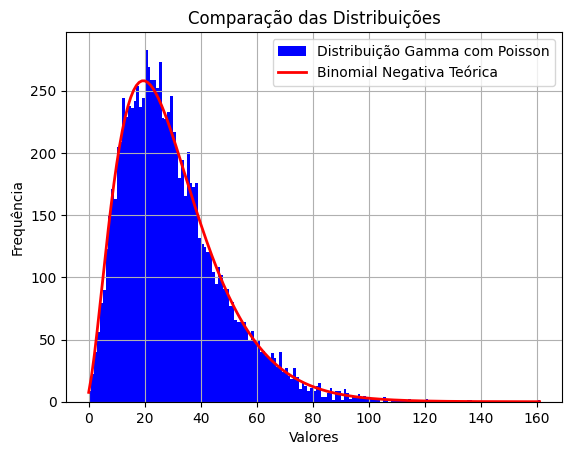

In [ ]:
plt.hist(dados_poga, bins=x_vals, density=False, label='Distribuição Gamma com Poisson', color="blue")

plt.plot(x_vals, y_escalonado,color='red', linewidth=2, label='Binomial Negativa Teórica')

plt.title('Comparação das Distribuições')
plt.ylabel('Frequência')
plt.grid(True)
plt.xlabel('Valores')
plt.legend()
plt.show()

##### Discussão acerca dos resultados
---


- A média e variância da distriuição binomial negativa são dadas pelos parâmetros da distribuição Gamma, $r$ (forma) e $\theta$ (escala) onde:

  $\mathbb E[Y] = r\theta$

  $var[Y] = r\theta(1 + \theta) = r\theta + r\theta^2$


com isso, conclui-se que:

1. A média é diretamente proporcional a $r$. Um aumento em $r$ leva a um aumento na média
2. A variância também é diretamente proporcional a $r$. Um aumento em $r$ leva a um aumento na variância
3.  A média é diretamente proporcional a $\theta$. Um aumento em $\theta$ leva a um aumento na média
4. A variância é uma função quadrática crescente de $\theta$ para $r > 0$. Um aumento em $\theta$ leva a um aumento na variância, e esse aumento é mais acentuado do que na média devido ao termo $r\theta^2$
  
---

- A sobredispersão refere-se a uma situação em que a variância é maior do que a média (var[Y] > E[Y])

$var[Y] = r\theta + r\theta^2 = E[Y] + r\theta^2$, Como $r > 0$ e $\theta > 0$ (parâmetros de uma distribuição Gamma):

1. $r\theta^2 > 0$
2. $Var[Y] > E[Y]$

ou seja, no modelo de mistura, a variância total de $Y$ é a soma da variância intrínseca do processo Poisson $(E[Y])$ e da variância adicional introduzida pela incerteza da taxa $\Lambda$ (que é $r\theta^2$), conseguindo assim representar a sobredispersão (diferentemente do processo de Poisson)

### Exercício 3

&nbsp;&nbsp;&nbsp;&nbsp; Neste exercício, vamos explorar uma forma simples de encontrar o ponto de mínimo de uma função usando um **método aleatório de busca**. A ideia é gerar sucessivamente novos valores de x, aceitando ou rejeitando as propostas conforme o quanto elas melhoram (ou pioram pouco) o valor da função. Esse tipo de algoritmo é conhecido como método de *Metropolis-Hastings*, muito usado em estatística e física para explorar regiões de interesse de uma função complicada. \
&nbsp;&nbsp;&nbsp;&nbsp; Considere a função
$$
f(x) = {x^4}-{4x^3}-{2x^2}-x+5
$$


##### 1. Implemente a função $f(x)$ no código.

In [ ]:
# Distribuições personalizadas
def my_bernoulli(p):
    uniform = np.random.uniform(0, 1)
    if uniform <= p:
        return 1
    else:
        return 0

def my_exponential(lam=1):
    u = np.random.uniform()
    x = - np.log(u) / lam
    return x

def my_normal(a=0, b=1):
    u = np.random.uniform()
    y = my_exponential()
    while u > np.exp(-((y-1) ** 2)/2):
        u = np.random.uniform()
        y = my_exponential()
    if my_bernoulli(0.5):
        y *= -1
    return a + np.sqrt(b) * y

In [ ]:
# Função que calcula f(x)
def f_x(x):
    return x ** 4 - 4 * x ** 3 -  2 * x ** 2 - x + 5

##### 2. Escolha uma posição inicial $x_0$ no intervalo $[-3,5]$.

In [ ]:
x_0 = np.random.uniform(-3, 5)
print(f"Posição inicial escolhida: {x_0}")

Posição inicial escolhida: 2.200375156252025


##### 3. Defina uma **temperatura** $T>0$. Esse parâmetro controla o quanto o algoritmo tolera aceitar movimentos para piores valores de f(x).

In [ ]:
T = 1

##### 4. Repita o procedimento descrito abaixo por $N = {10^5}$ iterações.

- Proponha um novo valor $x'$ sorteando um número de uma distribuição normal com média $x_t$ (posição atual) e desvio padrão $\sigma = 1$;

- Calcule o fator de aceitação

$$
\alpha = exp(-\frac{f(x') - f(x_t)}{T})
$$

- Aceite a proposta com probabilidade $min(1, \alpha)$. Caso contrário, mantenha o valor anterior. Ou seja:

$$
x_{t+1} =
\begin{cases}
x', & \text{com probabilidade } min(1, \alpha),\\
x_t, & \text{caso contrário.}
\end{cases}
$$

- Armazene o valor $x_t$ gerado


&nbsp;&nbsp;&nbsp;&nbsp; Seja $D = f(x') - f(x_t)$.  Se $f(x') < f(x_t)$, então $D < 0 \Rightarrow -D >0 $, o que significa que $\alpha > 1$ e $x_{t+1} = x'$ com probabilidade 1. Assim, neste caso não é necessário computar a exponencial, que com valores grandes pode gerar overflow.

In [ ]:
# Função que implementa Metropolis-Hastings
def metropolis_hastings(x_t=0, T=1, N=100000):
    f_x_t = f_x(x_t)
    proposals = [(x_t, f_x_t)]

    for i in range(N):
        x_prop = my_normal(x_t)
        f_x_prop = f_x(x_prop)
        D = f_x_prop - f_x_t
        if D < 0:  # Se D < 0, então alpha > 1, o que significa que a probabilidade de aceitação do x proposto seria 1.
            x_t = x_prop
            f_x_t = f_x(x_t)
        else:
            alpha = np.exp(- D / T)
            u = np.random.uniform(0, 1)
            if u <= alpha:  # Aceita x proposto com probabilidade alpha
                x_t = x_prop
                f_x_t = f_x(x_t)
        proposals.append((x_t, f_x_t))
    return proposals

In [ ]:
resultados = metropolis_hastings(x_0)

##### 5. Determine o menor valor de $f(x)$ encontrado e o ponto x correspondente.

In [ ]:
# Função que retorna o par (x, f(x)) com o menor f(x) encontrado pelo Metropolis Hastings
def menor_fx(pairs):
    min_fx = pairs[0]
    for pair in pairs:
        if pair[1] < min_fx[1]:
            min_fx = pair
    return min_fx

In [ ]:
# Mostra o par (x, f(x)) com o menor f(x) encontrado
menor = menor_fx(resultados)
print(f"Mínimo f(x) encontrado: {menor[1]}\n"
      f"Valor de x associado: {menor[0]}")

Mínimo f(x) encontrado: -45.24927189019043
Valor de x associado: 3.3235095541447754


##### 6. Plote o gráfico da função $f(x)$ no intervalo $[-3,5]$, destacando o ponto mínimo encontrado.

In [ ]:
# Função que plota o gráfico de f(x) e destaca o ponto mínimo encontrado
def plot_f(min_pair):
    x_axis = np.linspace(-3, 5, 100000)
    y_axis = f_x(x_axis)
    plt.plot(x_axis, y_axis)
    plt.scatter(min_pair[0], min_pair[1], color="green")
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico da função (ponto mínimo encontrado destacado em verde)")
    plt.show()

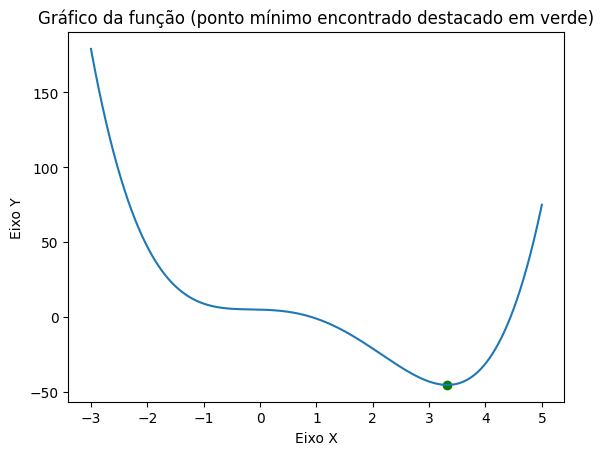

In [ ]:
# Plota o gráfico
plot_f(menor)

In [ ]:
# Função que plota o gráfico dos pares (x, f(x)) encontrados pelo algoritmo
def plot_found(proposals):
    x_axis = []
    y_axis = []
    for pair in proposals:
        x_axis.append(pair[0])
        y_axis.append(pair[1])
    plt.scatter(x_axis, y_axis)
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico dos pontos encontrados pelo algoritmo")
    plt.show()

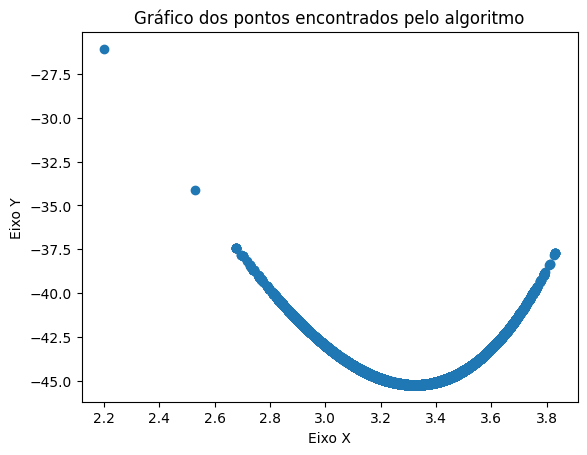

In [ ]:
# Plota o gráfico dos pares encontrados
plot_found(resultados)

In [ ]:
# Função que mostra a parcela de f(x) "explorada" pelo algoritmo
def plot_explored(proposals, min_pair, titulo):
    x_axis = np.linspace(-3, 5, 100000)
    y_axis = f_x(x_axis)
    plt.plot(x_axis, y_axis)

    x_axis2 = []
    y_axis2 = []
    for pair in proposals:
        x_axis2.append(pair[0])
        y_axis2.append(pair[1])
    plt.scatter(x_axis2, y_axis2, color="red")

    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title(titulo)
    plt.show()

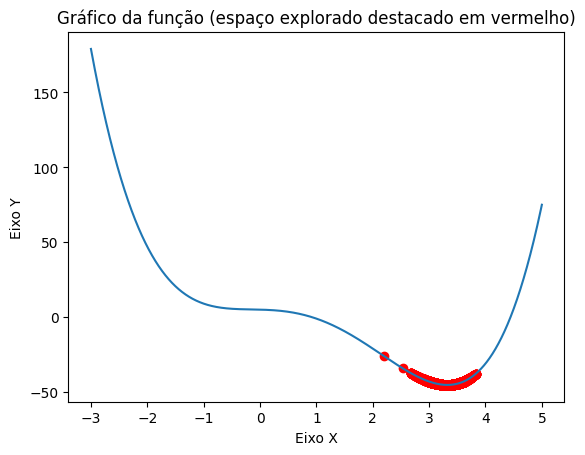

In [ ]:
# Plota o gráfico da parcela explorada
plot_explored(resultados, menor, titulo="Gráfico da função (espaço explorado destacado em vermelho)")

##### 7. Repita o experimento para diferentes temperaturas T. Observe e descreva o que acontece com o comportamento do algoritmo.

In [ ]:
print(f"Posição inicial: {x_0}")

Posição inicial: 2.200375156252025


Mínimo f(x) encontrado: -45.24886394573411
Valor de x associado: 3.319426254378817


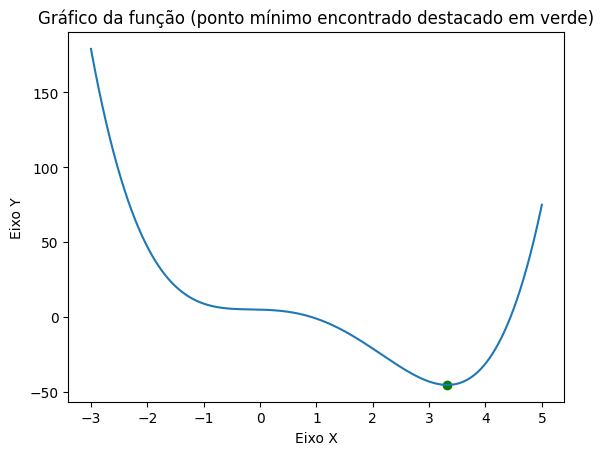

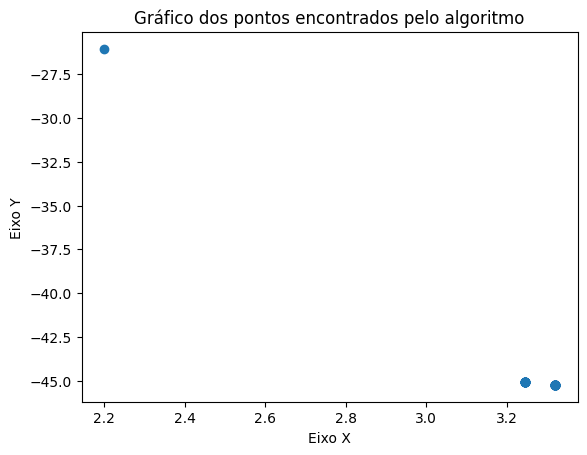

In [ ]:
# Experimento com T = 0.01
resultados_T001 = metropolis_hastings(x_t=x_0, T=0.01, N=50)
menor_T001 = menor_fx(resultados_T001)
print(f"Mínimo f(x) encontrado: {menor_T001[1]}\n"
      f"Valor de x associado: {menor_T001[0]}")
plot_f(menor_T001)
plot_found(resultados_T001)


Mínimo f(x) encontrado: -45.24843273450385
Valor de x associado: 3.3176470595992247


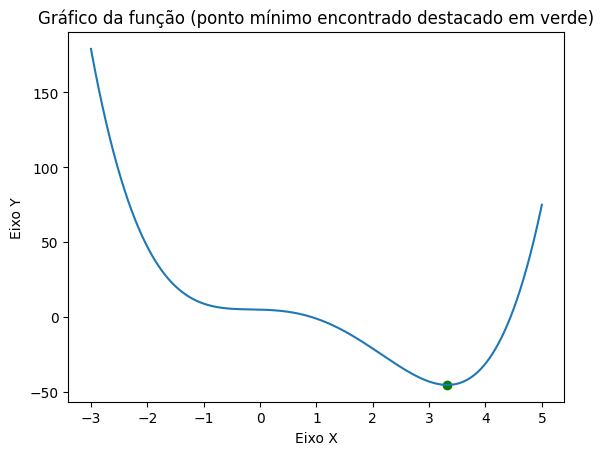

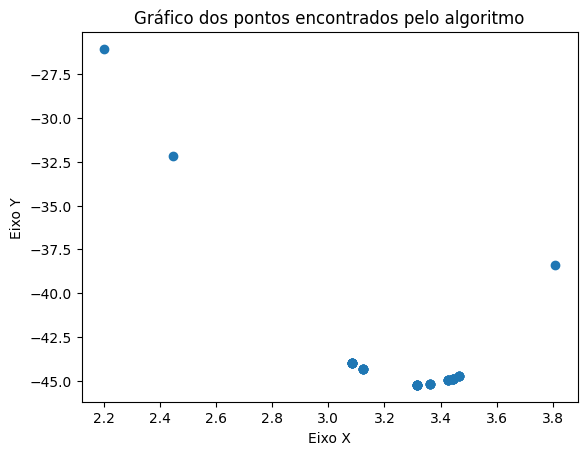

In [ ]:
# Experimento com T = 0.1
resultados_T01 = metropolis_hastings(x_t=x_0, T=0.1, N=50)
menor_T01 = menor_fx(resultados_T01)
print(f"Mínimo f(x) encontrado: {menor_T01[1]}\n"
      f"Valor de x associado: {menor_T01[0]}")
plot_f(menor_T01)
plot_found(resultados_T01)

Mínimo f(x) encontrado: -45.132624289466285
Valor de x associado: 3.3917833342784505


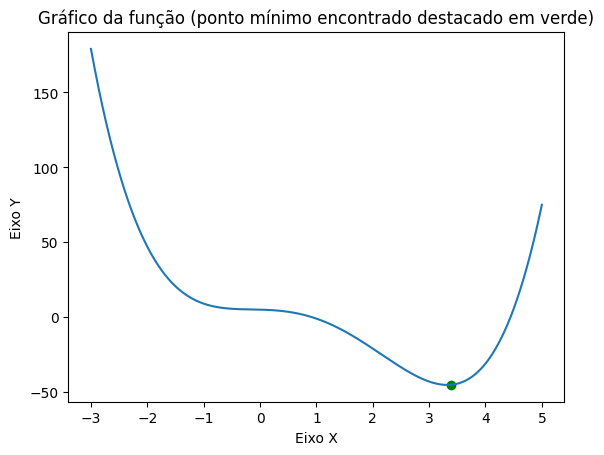

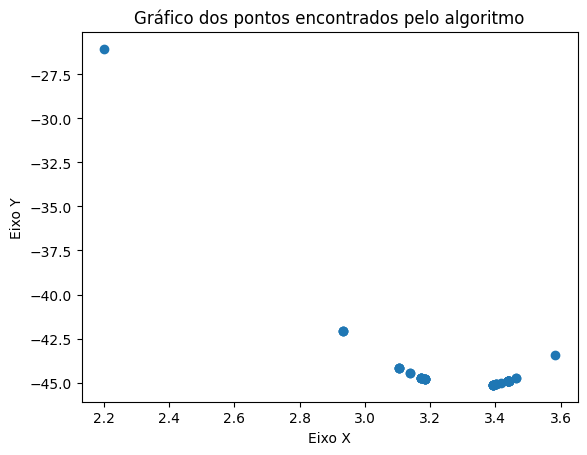

In [ ]:
# Experimento com T = 0.5
resultados_T05 = metropolis_hastings(x_t=x_0, T=0.5, N=50)
menor_T05 = menor_fx(resultados_T05)
print(f"Mínimo f(x) encontrado: {menor_T05[1]}\n"
      f"Valor de x associado: {menor_T05[0]}")
plot_f(menor_T05)
plot_found(resultados_T05)

Mínimo f(x) encontrado: -45.18620418159897
Valor de x associado: 3.2721687174039253


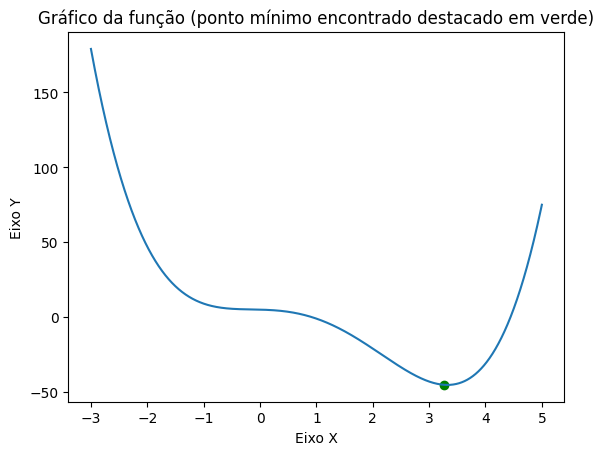

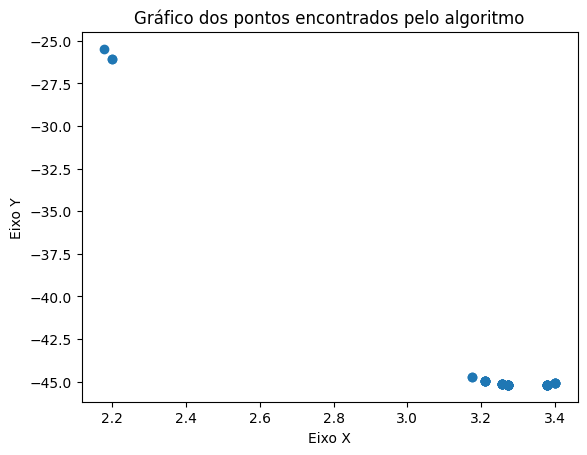

In [ ]:
# Experimento com T = 1
resultados_T1 = metropolis_hastings(x_t=x_0, T=1, N=50)
menor_T1 = menor_fx(resultados_T1)
print(f"Mínimo f(x) encontrado: {menor_T1[1]}\n"
      f"Valor de x associado: {menor_T1[0]}")
plot_f(menor_T1)
plot_found(resultados_T1)

Mínimo f(x) encontrado: -45.24927169445178
Valor de x associado: 3.3234289051276997


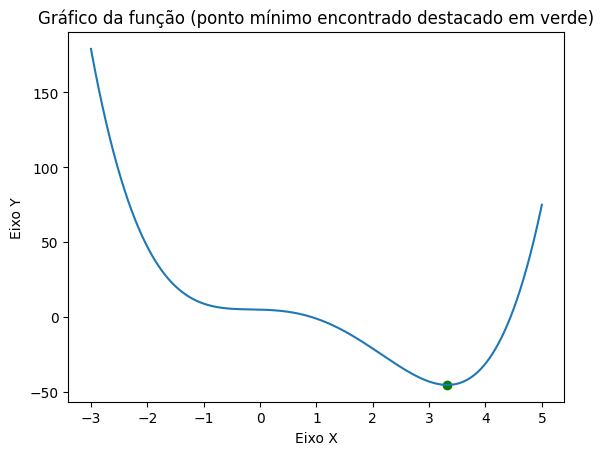

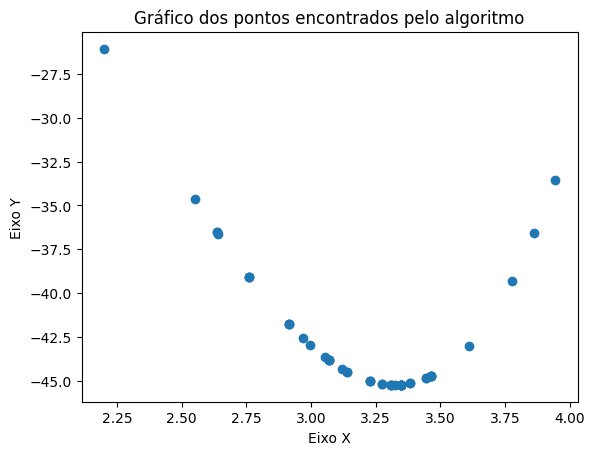

In [ ]:
# Experimento com T = 5
resultados_T5 = metropolis_hastings(x_t=x_0, T=5, N=50)
menor_T5 = menor_fx(resultados_T5)
print(f"Mínimo f(x) encontrado: {menor_T5[1]}\n"
      f"Valor de x associado: {menor_T5[0]}")
plot_f(menor_T5)
plot_found(resultados_T5)

Mínimo f(x) encontrado: -45.24170076976042
Valor de x associado: 3.3410780629815306


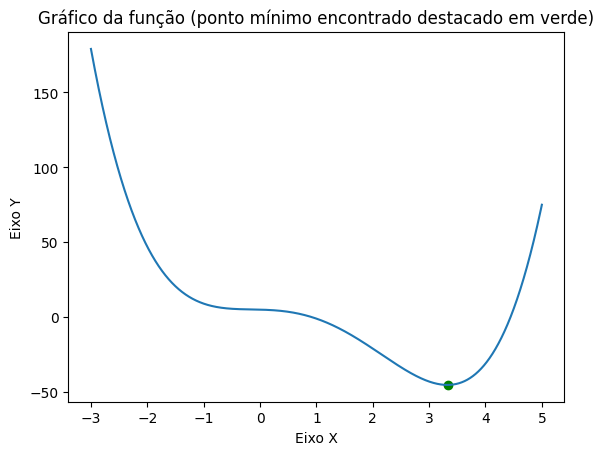

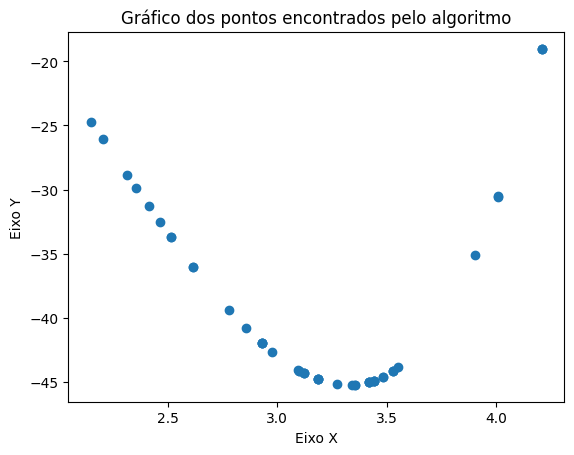

In [ ]:
# Experimento com T = 10
resultados_T10 = metropolis_hastings(x_t=x_0, T=10, N=50)
menor_T10 = menor_fx(resultados_T10)
print(f"Mínimo f(x) encontrado: {menor_T10[1]}\n"
      f"Valor de x associado: {menor_T10[0]}")
plot_f(menor_T10)
plot_found(resultados_T10)

Mínimo f(x) encontrado: -44.80371090321616
Valor de x associado: 3.184701135791122


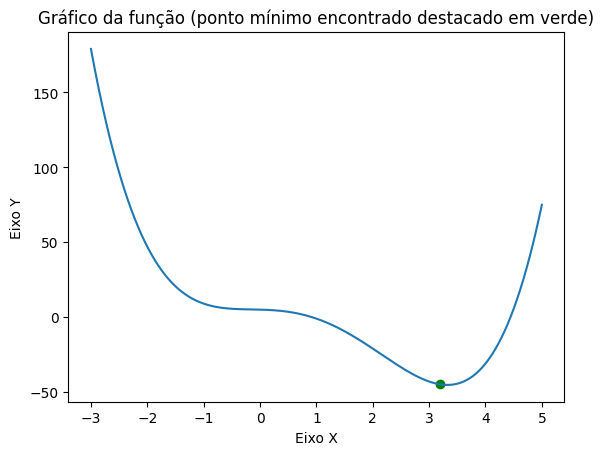

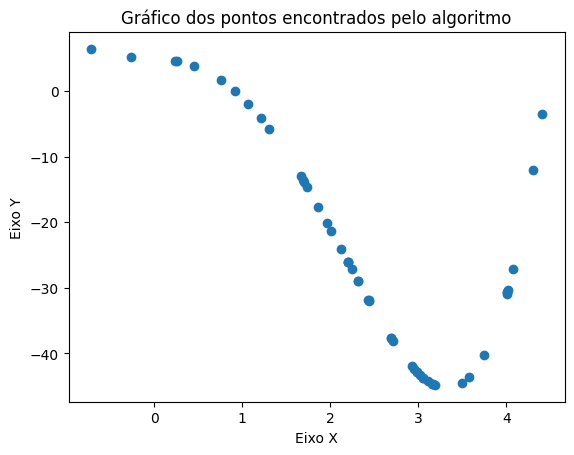

In [ ]:
# Experimento com T = 100
resultados_T100 = metropolis_hastings(x_t=x_0, T=100, N=50)
menor_T100 = menor_fx(resultados_T100)
print(f"Mínimo f(x) encontrado: {menor_T100[1]}\n"
      f"Valor de x associado: {menor_T100[0]}")
plot_f(menor_T100)
plot_found(resultados_T100)

Mínimo f(x) encontrado: -26.05588686097273
Valor de x associado: 2.200375156252025


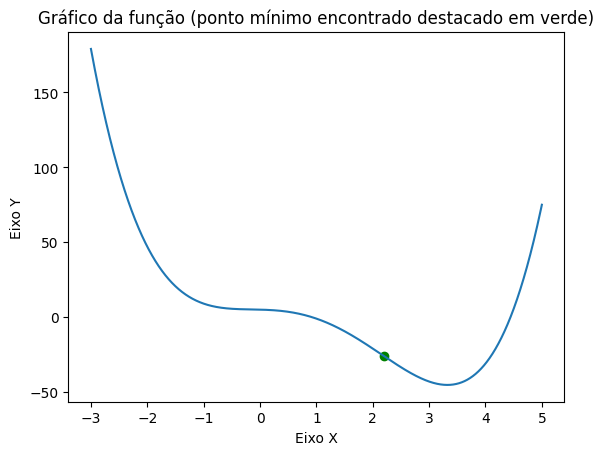

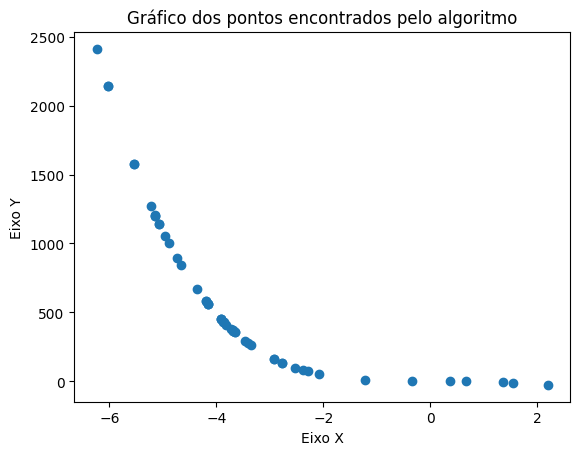

In [ ]:
# Experimento com T = 1000
resultados_T1000 = metropolis_hastings(x_t=x_0, T=1000, N=50)
menor_T1000 = menor_fx(resultados_T1000)
print(f"Mínimo f(x) encontrado: {menor_T1000[1]}\n"
      f"Valor de x associado: {menor_T1000[0]}")
plot_f(menor_T1000)
plot_found(resultados_T1000)

Posição inicial: 2.200375156252025


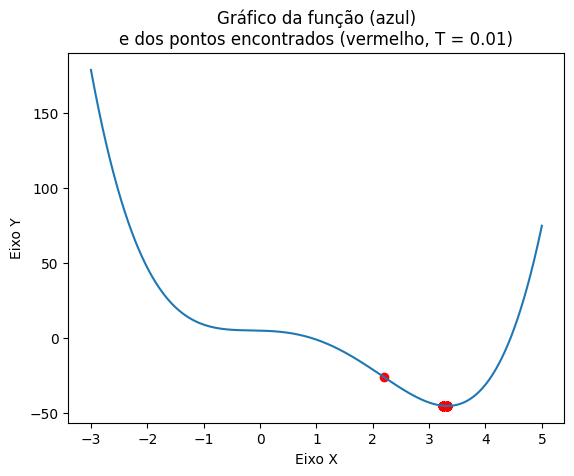

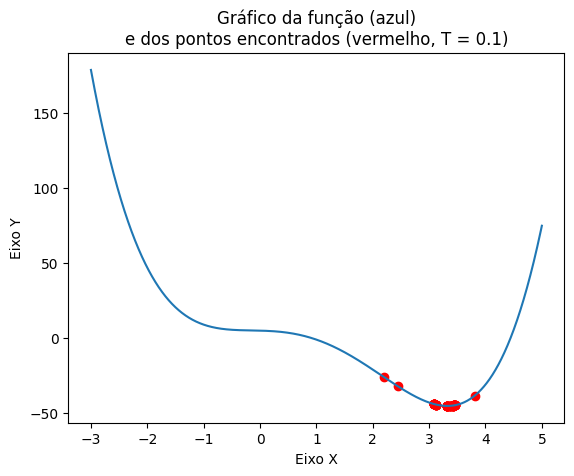

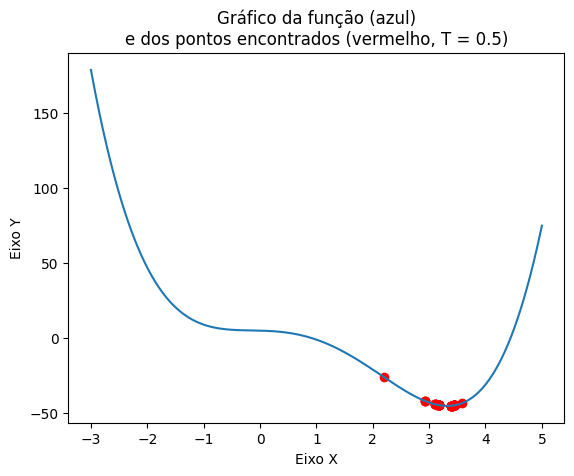

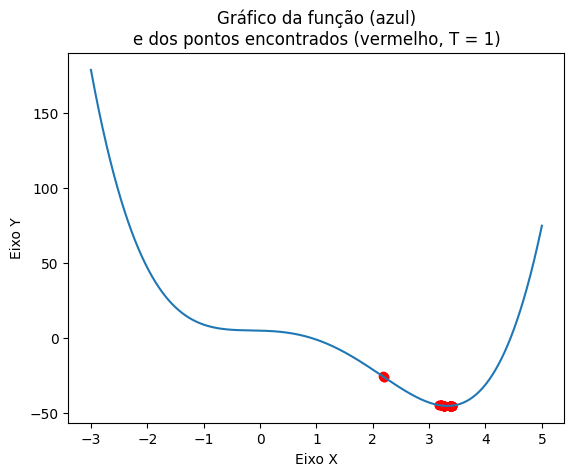

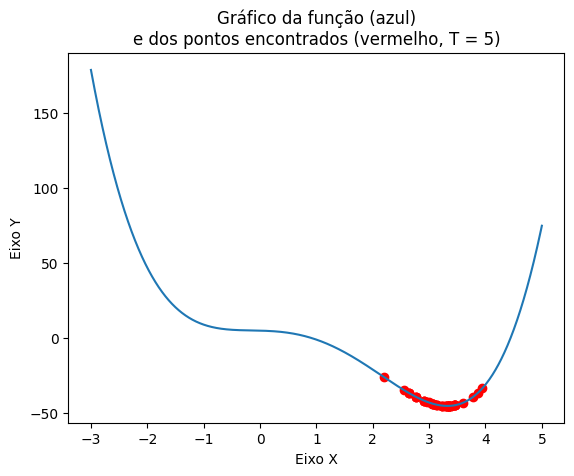

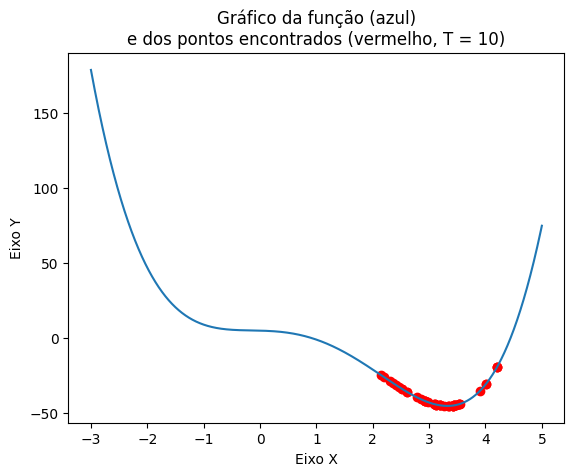

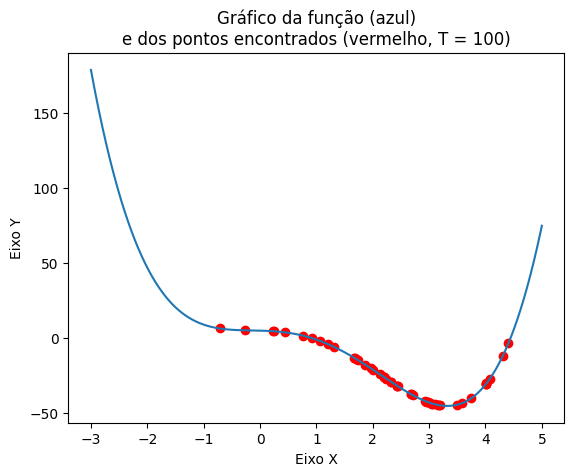

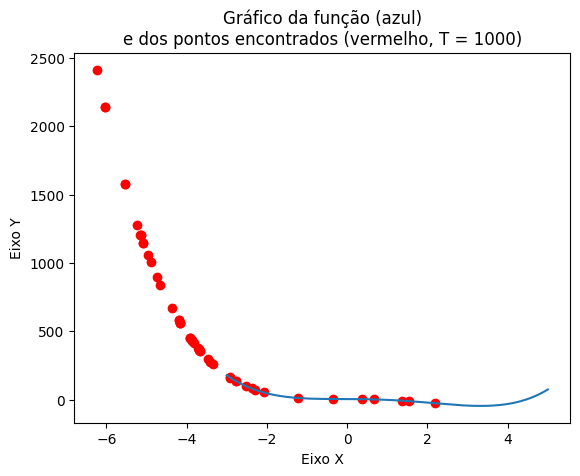

In [ ]:
# Plota os gráficos do espaço explorado para diferentes Ts
print(f"Posição inicial: {x_0}")
plot_explored(resultados_T001, menor_T001, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 0.01)")
plot_explored(resultados_T01, menor_T01, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 0.1)")
plot_explored(resultados_T05, menor_T05, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 0.5)")
plot_explored(resultados_T1, menor_T1, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 1)")
plot_explored(resultados_T5, menor_T5, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 5)")
plot_explored(resultados_T10, menor_T10, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 10)")
plot_explored(resultados_T100, menor_T100, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 100)")
plot_explored(resultados_T1000, menor_T1000, titulo="Gráfico da função (azul)\ne dos pontos encontrados (vermelho, T = 1000)")

&nbsp;&nbsp;&nbsp;&nbsp; Foi observado que, quando T é pequeno, os pontos fornecidos pelo algoritmo rapidamente se concentram ao redor do mínimo de $f(x)$, ao passo que quando T aumenta, o algoritmo tende a demorar mais para aproximar esse mínimo, porém também explora uma região maior da função. Além disso, mesmo após encontrar valores muito próximos do mínimo, o algoritmo ainda consegue sair da proximidade destes valores e explorar valores distantes (ou seja, piores). Isso é explicado pelo fato de que, se T está próximo de 0, $\alpha$ assumirá valores extremamente baixos quando $f(x)' > f(x_t)$, quase sempre rejeitando valores piores, e se T é grande, $\alpha$ assumirá valores próximos de 1, quase sempre aceitando valores piores. De fato, tomando $D = f(x') - f(x_t)$ como anteriormente, se D > 0 (ou seja, se $x'$ proposto é pior do que $x_t$):

$$
\lim_{T \to 0} \alpha = \lim_{T \to 0} exp(- \frac{D}{T}) = 0
\qquad
\text{ e }
\qquad
\lim_{T \to \infty} \alpha = \lim_{T \to \infty} exp(- \frac{D}{T}) = 1
$$

&nbsp;&nbsp;&nbsp;&nbsp; Assim, seria esperado que, para funções com vários pontos de mínimos locais, seria necessário T grande para que o algoritmo não ficasse preso em um destes e pudesse encontrar o mínimo global, sacrificando no entanto a velocidade da convergência para um valor mínimo.

&nbsp;&nbsp;&nbsp;&nbsp; Vale notar, no entanto, que o algoritmo mostrou-se extremamente eficiente para encontrar o mínimo da função examinada. Mesmo com N extremamente baixo, só valores altos (>50) de T fizeram com que o algoritmo ocasionalmente não conseguisse rapidamente aproximar o mínimo.

### Exercício 4

Neste exercício, vamos estimar a temperatura média em diferentes pontos de uma chapa circular usando
simulações aleatórias.
Imagine uma chapa de raio R = 1. Cada ponto da borda tem uma temperatura fixa dada por:
$$
g(x, y) = \begin{cases}
1, se & x > 0, \\
0, se & x ≤ 0.
\end{cases}
$$
Isso significa que a metade direita da borda (onde x > 0) está quente (u = 1), enquanto a metade esquerda (onde x < 0)
está fria (u = 0). Nosso objetivo é estimar a temperatura média u(x0, y0) em um ponto dentro da chapa.

Para isso, vamos usar a seguinte ideia: imagine uma partícula de calor que começa em um ponto (x0, y0) dentro
da chapa e se move de forma totalmente aleatória, dando pequenos passos em todas as direções. A partícula continua se
movendo até sair da chapa (isto é, até atingir a borda onde x2 + y
2 = 1). No momento em que toca a borda, ela “mede”
a temperatura do ponto onde saiu. Se repetirmos esse experimento muitas vezes e fizermos a média das temperaturas
observadas, essa média aproxima a temperatura u(x0, y0) no ponto inicial.

Vamos seguir o seguinte procedimento:
1. Escolha um ponto inicial $(x_0, y_0)$ dentro da chapa, por exemplo (0, 0) ou (0.5, 0).
2. Faça M simulações independentes. Em cada simulação:

• Comece em $(x, y) = (x_0, y_0)$;

• Em cada passo, atualize a posição:
$$
(x, y) ← (x, y) + √(
∆t) Z, \: Z ∼ N (0, I2).
$$
Perceba que temos um movimento browniano para cada coordenada.

• Pare quando a partícula sair da chapa, isto é, quando $x^2 + y^2 ≥ 1$;

• Registre o ponto de saída $(x_{saída}, y_{saída})$ e o valor de $g(x_{saída}, y_{saída})$.

3. A estimativa da temperatura no ponto inicial é a média dos valores observados:

$$
u(x_0, y_0) = \frac{1}{M}∑^{M}_{i=1}g(x^{(i)}_{saída}, y^{
(i)}_{saída}).
$$

Agora responda o seguinte:

In [ ]:
T = 1

def exponencial_inversao(lamb):
  valor = np.random.uniform()
  return (-1*np.log(valor))/lamb

def bernoulli(p):
  u = np.random.uniform()
  if u <= p:
    return 1
  else:
    return -1

def normal_aceitacao():
  u = np.random.uniform()
  y = exponencial_inversao(1)
  while u > np.exp(-((y-1)**2)/2):
    u = np.random.uniform()
    y = exponencial_inversao(1)
  b = bernoulli(1/2)
  return b*y

def temperatura(cord):
  if cord[0] >= 0:
    return 1
  if cord[0] < 0:
    return 0

def est_pont_temp(n,cord):
  dicionario = {"Cordenada":cord,"Temperatura":None}
  lista = []
  for i in range(n):
    y = np.array(cord)
    while y[0]**2 + y[1]**2 < 1:
      y = y + np.sqrt(T/n)*np.array([normal_aceitacao(),normal_aceitacao()])
    temp = temperatura(y)
    lista.append(temp)
  dicionario["Temperatura"] = np.mean(lista)
  return dicionario

##### a) Repita o experimento para diferentes pontos iniciais, como $(0, 0), (0.3, 0) \text{ e } (0.7, 0)$, e compare os valores estimados.

In [ ]:
print(est_pont_temp(1000,[0,0])["Temperatura"])
print(est_pont_temp(1000,[0.3,0])["Temperatura"])
print(est_pont_temp(1000,[0.7,0])["Temperatura"])

0.483
0.698
0.884


##### b) Verifique que a temperatura média aumenta conforme o ponto se aproxima do lado quente da borda.

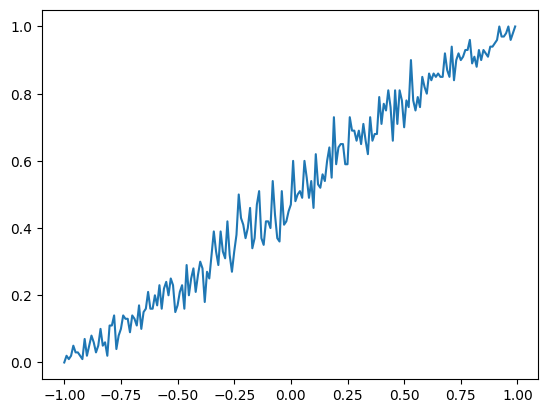

In [ ]:
x = [ i/100 for i in range(-100,100)]
y = []
for i in x:
  a = est_pont_temp(100,[i,0])["Temperatura"]
  y.append(a)
plt.plot(x,y)

##### c) Explique, em suas palavras, por que esse método funciona e como o movimento aleatório das partículas está relacionado **a difusao de calor**.

R: Sab-se que a difusão de calor está associada a 3 fatores: condução, convecção e radiação. Assumindo uma chapa metálica no vácuo excluimos os fatores de convecção e radiação, sendo assim, temos o efeito de condução, que é quando o calor é transferido através do contato entre átomos.

Como não é possível deterministicamente controlar o comportamento  de todos os átomos da chapa para saber quem está esbarrando em quem é possível fazer isso através de aleatoriedade, ao soltar uma partícula e deixá-la seguir um caminho aleatório a probabilidade de esbarrar na borda quente ou fria modela ma média a dispersão do calor da chapa

##### d) Compare seus resultados com os valores teóricos aproximados abaixo (obtidos da solução analítica harmônica):
$u(0,0) = 0.5, \qquad u(0.3, 0) \approx 0.63, \qquad u(0.7, 0) \approx 0.83.$

In [ ]:
aprox_1 = est_pont_temp(1000,[0,0])["Temperatura"]
aprox_2 = est_pont_temp(1000,[0.3,0])["Temperatura"]
aprox_3 = est_pont_temp(1000,[0.8,0])["Temperatura"]
print(f'u(0, 0): Teórico - 0.5; Aproximado - {aprox_1} ; Erro - {0.5-aprox_1}')
print(f'u(0.3, 0): Teórico - 0.63; Aproximado - {aprox_2} ; Erro - {0.63-aprox_2}')
print(f'u(0.7, 0): Teórico - 0.83; Aproximado - {aprox_2} ; Erro - {0.83-aprox_3}')

u(0, 0): Teórico - 0.5; Aproximado - 0.492 ; Erro - 0.008000000000000007
u(0.3, 0): Teórico - 0.63; Aproximado - 0.675 ; Erro - -0.04500000000000004
u(0.7, 0): Teórico - 0.83; Aproximado - 0.675 ; Erro - -0.08500000000000008


##### e) Para cada ponto inicial do item anterior, plote algumas das trajetórias simuladas dentro da chapa. Represente o círculo de raio 1 (a borda da chapa) e as trajetórias das partículas que começaam em (0, 0), (0.3, 0) e (0.7, 0). Use cores diferentes para distinguir cada ponto inicial e destaque os pontos de partida e de saída das partículas.


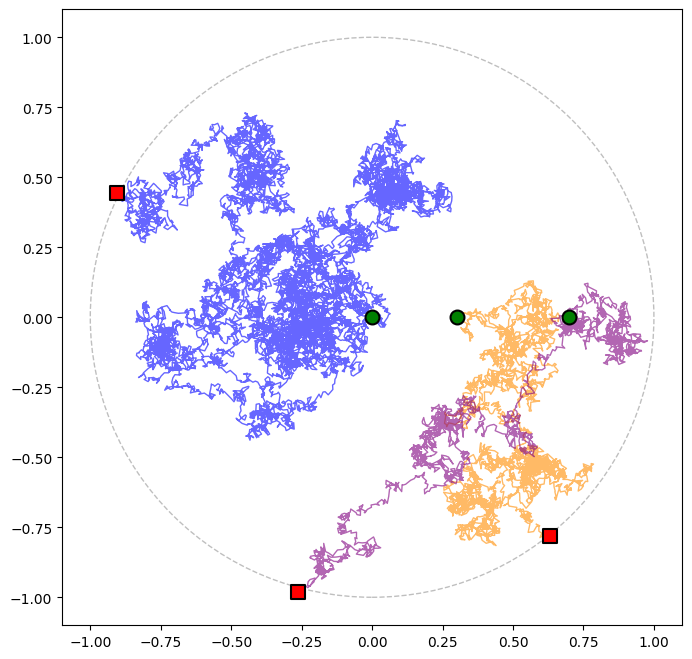

In [ ]:
def mov_browniano(cord):
  y = np.array(cord)
  lista = [y]
  while y[0]**2 + y[1]**2 < 1:
    y = y + np.sqrt(T/10000)*np.array([normal_aceitacao(),normal_aceitacao()])
    lista.append(y)
  return lista

list_1 = mov_browniano([0,0])
list_2 = mov_browniano([0.3,0])
list_3 = mov_browniano([0.7,0])

plt.figure(figsize=(8, 8))

def plot_trajetoria(lista, cor, label):
    x = [p[0] for p in lista]
    y = [p[1] for p in lista]
    plt.plot(x, y, color=cor, alpha=0.6, linewidth=1, label=label)
    plt.scatter(x[0], y[0], color='green', s=100, zorder=5, edgecolors='black', linewidth=1.5, marker='o')
    plt.scatter(x[-1], y[-1], color='red', s=100, zorder=5, edgecolors='black', linewidth=1.5, marker='s')

plot_trajetoria(list_1, 'blue', 'Trajetória 1')
plot_trajetoria(list_2, 'darkorange', 'Trajetória 2')
plot_trajetoria(list_3, 'purple', 'Trajetória 3')
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_patch(circle)
plt.show()

f) Gere um mapa de calor com as estimativas obtidas via Monte Carlo sobre uma malha de pontos dentro da chapa e compare visualmente com o mapa correspondente da **solução analítica exata**

$$
u(r, θ) = \frac{1}{2} + \frac{1}{π} arctan[2r \frac{cos(θ)}{(1-r²)}].
$$

Comente se o gradiente de temperatura (do lado frio ao quente) e os valores médios estão consistentes entre as duas
abordagens.
Esses valores mostram como o calor “se difunde” de forma suave da região quente para a fria: quanto mais próximo
do lado direito (x > 0), maior a temperatura média esperada.


100%|██████████| 40/40 [22:58<00:00, 34.47s/it]


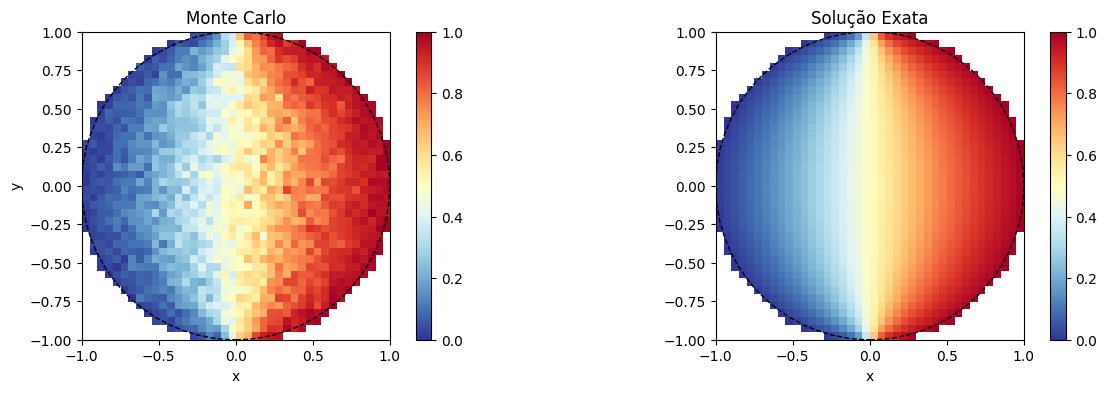

In [ ]:
M = 100
N = 40

def temperatura(cord):
  if cord[0] >= 0:
    return 1
  if cord[0] < 0:
    return 0

def mov_browniano(cord):
  y = np.array(cord)
  lista = [y]
  while y[0]**2 + y[1]**2 < 1:
    y = y + np.sqrt(T/1000)*np.array([normal_aceitacao(),normal_aceitacao()])
    lista.append(y)
  return lista

def temperatura_monte_carlo(cord, M):
  soma = 0.0
  for _ in range(M):
    lista_aux = mov_browniano(cord)
    soma += temperatura(lista_aux[-1])
  return soma / M

def solucao_exata(x, y):
  r = np.sqrt(x**2 + y**2)
  if r == 0:
    return 0.5
  if r >= 1:
    if x > 0:
      return 1.0
    elif x < 0:
      return 0.0
    else:
      return 0.5
  cos_theta = x / r
  num = 2*r*cos_theta
  den = 1-r**2
  return 0.5 + (1/np.pi) * np.arctan(num/den)

pontos_x = np.linspace(-0.95, 0.95, N)
pontos_y = np.linspace(-0.95, 0.95, N)
temp_monte = np.zeros((N, N))
temp_exata = np.zeros((N, N))
comeco = time.time()

for i in tqdm(range(N)):
  for j in range(N):
    x0 = pontos_x[j]
    y0 = pontos_y[i]
    if x0**2 + y0**2 < 0.99:
      temp_monte[i, j] = temperatura_monte_carlo([x0,y0], M)
      temp_exata[i, j] = solucao_exata(x0, y0)
    else:
      temp_monte[i, j] = np.nan
      temp_exata[i, j] = np.nan

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

im1 = ax1.imshow(temp_monte, extent=(-1, 1, -1, 1), origin='lower', cmap='RdYlBu_r', vmin=0, vmax=1)
ax1.set_title('Monte Carlo')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.colorbar(im1, ax=ax1)

circulo = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1)
ax1.add_patch(circulo)

im2 = ax2.imshow(temp_exata, extent=(-1, 1, -1, 1), origin='lower', cmap='RdYlBu_r', vmin=0, vmax=1)
ax2.set_title('Solução Exata')
ax2.set_xlabel('x')
plt.colorbar(im2, ax=ax2)
circulo2 = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1)
ax2.add_patch(circulo2)
plt.show()

### Exercício 5

Neste exercício, vamos estudar várias relações de transformção entre distribuições de probabilidade. Em
cada caso, demonstre a relação teoricamente e confirme-a por meio de simulação.

1. **Transformação Beta:** Mostre que se X ∼ Beta(α, β), então 1 − X ∼ Beta(β, α). Em seguida, gere $n = 10^5$
amostras de X ∼ Beta(2, 5), calcule Y = 1 − X e compare o histograma de Y com a densidade teórica de uma
Beta(5, 2).

2. **Transformação Binomial:** Mostre que se X ∼ Binomial(n, p), então n − X ∼ Binomial(n, 1 − p). Simule várias amostras de uma Binomial(10,0.3), compute Y = 10 − X e verifique se a distribuição empírica coincide
com uma Binomial(10, 0.7).

3. **Transformação da Laplace (Dupla Exponencial):** Mostre que se X ∼ Laplace(0, λ), então |X| ∼ Exponencial(λ).
Simule X ∼ Laplace(0, 1), compute Y = |X| e verifique empiricamente essa relação.

4. **Recıproca da Uniforme:** Mostre que se X ∼ Uniforme(0, 1), então $Y = e^X$ tem densidade proporcional a 1/y em [1 , e]. Verifique empiricamente essa transformação gerando 105
amostras uniformes e comparando com a
densidade teórica.

5. **Mínimo de Exponenciais:** Mostre que, se $X_1, X_2, . . . , X_n$ são variáveis aleatórias independentes com
Xi ∼ Exponencial(λi), então o mínimo $Y = min(X_1, X_2, . . . , X_n)$
segue uma distribuição Exponencial(λ1 + λ2 + · · · + λn). Faça uma simulação com n = 3 e taxas λ1 = 1, λ2 =
2 e λ3 = 3, gerando 105
amostras. Compare o histograma de Y com a densidade te´orica de uma Exponencial(6).
Explique intuitivamente por que isso acontece

##### Demonstrações

1. Seja $X \sim \text{Beta}(\alpha, \beta)$. Então:

$$
f_X(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}, \quad 0 < x < 1,
$$

Defina $Y = 1 - X$. A transformação é $y = 1 - x$, com Jacobiano $\left|\frac{dx}{dy}\right| = 1$. A densidade de $Y$ é:

$$
f_Y(y) = f_X(1-y) \cdot 1 =\frac{(1-y)^{\alpha-1} [1-(1-y)]^{\beta-1}}{B(\alpha, \beta)}= \frac{(1-y)^{\alpha-1} y^{\beta-1}}{B(\alpha, \beta)}, \quad 0 < y < 1.
$$

Notando que $B(\alpha, \beta) = B(\beta, \alpha)$, temos que $Y$ possui a densidade de uma distribuição $\text{Beta}(\beta, \alpha)$. Portanto, $Y \sim \text{Beta}(\beta, \alpha)$.

---


2. Seja $X \sim \text{Binomial}(n, p)$. A função de probabilidade de $X$ é:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0,1,\dots,n.
$$

Defina $Y = n - X$. Então, para $y = 0,1,\dots,n$, temos:

$$
P(Y = y) = P(X = n - y) = \binom{n}{n-y} p^{n-y} (1-p)^{n-(n-y)} = \binom{n}{y} (1-p)^n p^{n-y},
$$

pois $\binom{n}{n-y} = \binom{n}{y}$. Isso é exatamente a função de probabilidade de uma distribuição $\text{Binomial}(n, 1-p)$. Portanto, $Y \sim \text{Binomial}(n, 1-p)$.

---


3. Seja $X \sim \text{Laplace}(0, \lambda)$, com densidade:

$$
f_X(x) = \frac{1}{2\lambda} e^{-|x|/\lambda}, \quad x \in \mathbb{R}.
$$

Defina $Y = |X|$. Para $y \geq 0$, a função de distribuição acumulada de $Y$ é:

$$
F_Y(y) = P(|X| \leq y) = P(-y \leq X \leq y) = \int_{-y}^{y} \frac{1}{2\lambda} e^{-|t|/\lambda} dt.
$$

Devido à simetria:

$$
\int_{-y}^{y} \frac{1}{2\lambda} e^{-|t|/\lambda} dt = 2 \int_{0}^{y} \frac{1}{2\lambda} e^{-t/\lambda} dt = \int_{0}^{y} \frac{1}{\lambda} e^{-t/\lambda} dt = 1-e^y/λ.
$$


que é a função distribuição de uma $\text{Exponencial}(\lambda)$. Portanto, $Y \sim \text{Exponencial}(\lambda)$.

---


4. Seja $X \sim \text{Uniforme}(0,1)$, com densidade $f_X(x) = 1$ para $0 < x < 1$. Defina $Y = e^X$. A transformação é estritamente crescente, com $x = \ln y$ e Jacobiano $\frac{dx}{dy} = \frac{1}{y}$. O suporte de $Y$ é $(1, e)$, pois quando $x \in (0,1)$, $y \in (1, e)$. A densidade de $Y$ é:

$$
f_Y(y) = f_X(\ln y) \left| \frac{dx}{dy} \right| = 1 \cdot \frac{1}{y} = \frac{1}{y}, \quad 1 < y < e.
$$

---


5. Sejam $X_1, X_2, \dots, X_n$ variáveis aleatórias independentes com $X_i \sim \text{Exponencial}(\lambda_i)$. A função de distribuição acumulada de cada $X_i$ é:

$$
F_{X_i}(x) = 1 - e^{-\lambda_i x}, \quad x \geq 0.
$$

Defina $Y = \min(X_1, X_2, \dots, X_n)$. Para $y \geq 0$, temos:

$$
F_Y(y) = P(Y \leq y) = 1 - P(Y > y) = 1 - P(X_1 > y, X_2 > y, \dots, X_n > y).
$$

Pela independência:

$$
P(Y > y) = \prod_{i=1}^n P(X_i > y) = \prod_{i=1}^n e^{-\lambda_i y} = e^{-(\sum_{i=1}^n \lambda_i) y}.
$$

Portanto,

$$
F_Y(y) = 1 - e^{-(\sum_{i=1}^n \lambda_i) y},
$$

que é a função de distribuição acumulada de uma variável aleatória $\text{Exponencial}(\sum_{i=1}^n \lambda_i)$. Logo, $Y \sim \text{Exponencial}(\lambda_1 + \lambda_2 + \cdots + \lambda_n)$.

##### 1. **Transformação Beta**

In [ ]:
def my_gamma(k, theta):
    soma = 0
    for _ in range(k):
        soma += my_exponential(1 / theta)
    return soma

In [ ]:
def my_beta(a: int, b: int):
    x = my_gamma(a, 1)
    y = my_gamma(b, 1)
    return x / (x + y)

In [ ]:
def factorial(a: int):
    if a == 1 or a == 0:
        return 1
    return a * factorial(a - 1)

In [ ]:
def int_beta_func(a: int, b: int):
    return factorial(a - 1) * factorial(b - 1) / factorial(a + b - 1)

In [ ]:
def beta_pdf(x, a=int, b=int):
    return (x ** (a - 1)) * ((1 - x) ** (b - 1)) / int_beta_func(a, b)

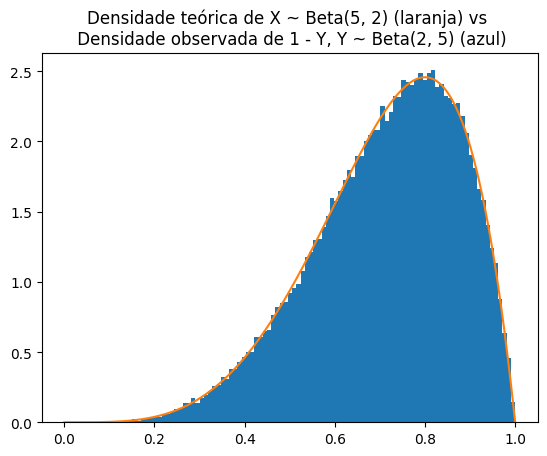

In [85]:
beta_samples1 = []
N = 100000
for i in range(N):
    beta_samples1.append(my_beta(2, 5))

beta_samples2 = [1 - beta_samples1[i] for i in range(N)]

x_axis = np.linspace(0, 1, 100000)
y_axis = beta_pdf(x_axis, 5, 2)
plt.hist(beta_samples2, bins=100, density=True)
plt.plot(x_axis, y_axis)
plt.title("Densidade teórica de X ~ Beta(5, 2) (laranja) vs \n Densidade observada de 1 - Y, Y ~ Beta(2, 5) (azul)")
plt.show()

##### 2. **Transformação Binomial**

In [ ]:
def binomial_inversao_recursiva(n, p):
    unif = np.random.uniform()
    i = 0
    pi = (1-p) ** n
    F = pi
    while unif > F:
        pi = ((n - i) / (i + 1)) * p / (1-p) * pi
        i += 1
        F = F + pi
    return i

In [ ]:
def factorial(a: int):
    if a == 1 or a == 0:
        return 1
    return a * factorial(a - 1)

In [ ]:
def binomial_pf(x, n: int, p: float):
    comb = factorial(n) / (factorial(n - x) * factorial(x))
    return comb * (p ** x) * (1-p) ** (n - x)

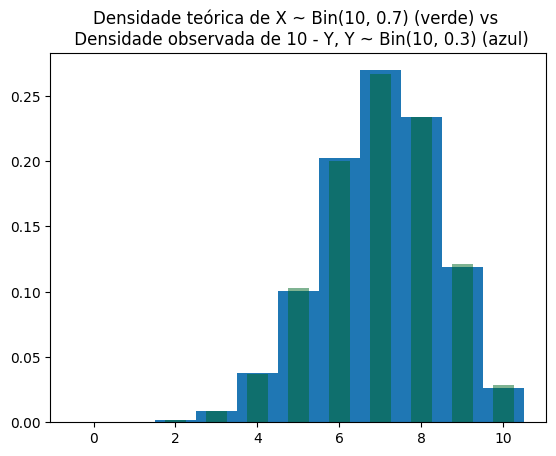

In [86]:
N = 10000
binomial_samples1 = [binomial_inversao_recursiva(10, 0.3) for i in range(N)]
binomial_samples2 = [10 - binomial_samples1[j] for j in range(N)]

x_axis = [i for i in range(11)]
y_axis = [binomial_pf(x_value, 10, 0.7) for x_value in x_axis]

bins = np.arange(-0.5, 11.5, 1)
plt.hist(binomial_samples2, bins=bins, density=True)
plt.bar(x_axis, y_axis, width=0.5, color="#006927", alpha=0.5)
plt.title("Densidade teórica de X ~ Bin(10, 0.7) (verde) vs \n Densidade observada de 10 - Y, Y ~ Bin(10, 0.3) (azul)")
plt.show()

##### 3. Transformação da Laplace (Dupla Exponencial)

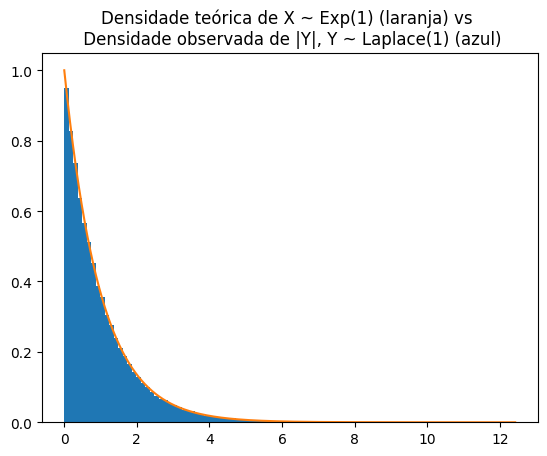

In [84]:
def laplace(l):
  u = np.random.uniform()
  if u < 0.5:
    x = l*np.log(2*u)
  else:
    x = (-1)*l*np.log(2*(1-u))
  return x

def exponencial_abs(l):
  x = laplace(l)
  return abs(x)

def exp_pdf(x, l):
    return l * np.exp(-l * x)

lista = []
for i in range(100000):
  a = exponencial_abs(1)
  lista.append(a)

x_axis = np.linspace(np.min(lista), np.max(lista), 100000)
y_axis = exp_pdf(x_axis, 1)

plt.hist(lista, density=True, bins=100)
plt.plot(x_axis, y_axis)
plt.title("Densidade teórica de X ~ Exp(1) (laranja) vs \n Densidade observada de |Y|, Y ~ Laplace(1) (azul)")
plt.show()

##### 4. Recíproca da Uniforme

In [ ]:
e = math.e

In [ ]:
def uni(n):
  b=0
  dados = []
  while b<n:
    x = np.random.uniform()
    y = e**x
    dados.append(y)
    b += 1
  return dados

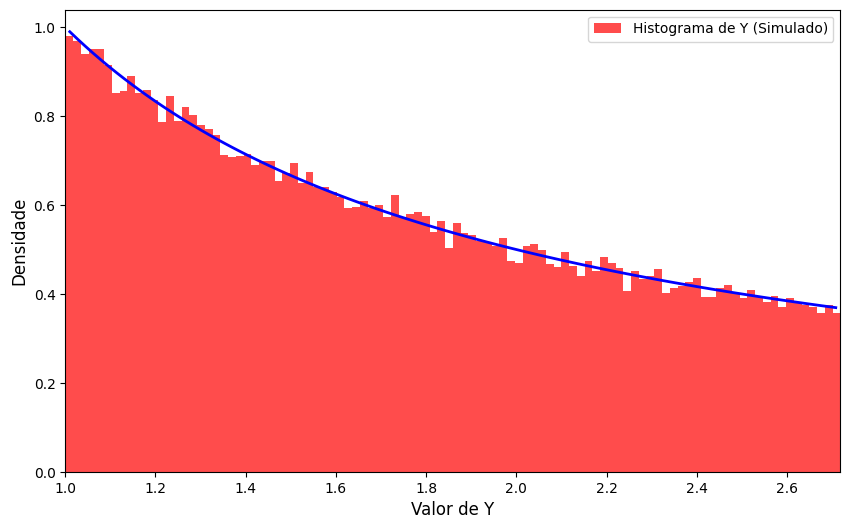

In [ ]:
dist = uni(10**5)

y_min = 1.0
y_max = np.e
y_axis = np.linspace(y_min + 0.01, y_max - 0.01, 100)

fdp_teorica = 1 / y_axis
plt.figure(figsize=(10, 6))

plt.hist(dist, bins=100, density=True, label='Histograma de Y (Simulado)', color='red', alpha=0.7)

plt.plot(y_axis, fdp_teorica, 'b-', lw=2)


plt.xlabel('Valor de Y', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(fontsize=10)
plt.xlim(y_min, y_max)
plt.show()

##### 5. Mínimo de Exponenciais

In [66]:
def exp (lam, n):
  u = np.random.uniform(0, 1, n)
  x = -np.log(u) /lam
  return x

In [67]:
N = 100000
l1 = 1
l2 = 2
l3 = 3
l_sum_teorico = l1 + l2 + l3

In [68]:
X1 = exp(l1, N)
X2 = exp(l2, N)
X3 = exp(l3, N)

Y = np.minimum(np.minimum(X1, X2), X3)

In [69]:
x = np.linspace(0, np.max(Y), 1000)
f_teorica = l_sum_teorico * np.exp(-l_sum_teorico * x)

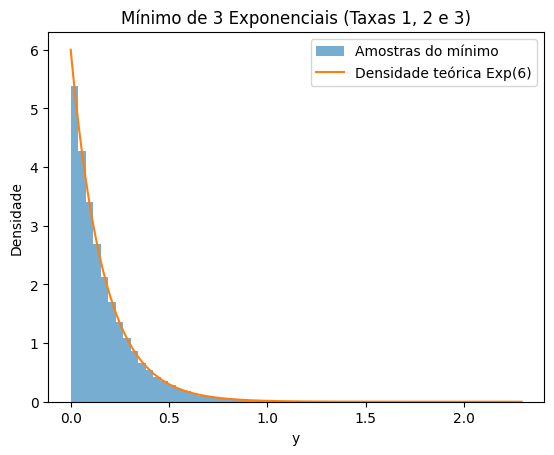

In [70]:
plt.hist(Y, bins=60, density=True, alpha=0.6, label="Amostras do mínimo")
plt.plot(x, f_teorica, label="Densidade teórica Exp(6)")

plt.title("Mínimo de 3 Exponenciais (Taxas 1, 2 e 3)")
plt.xlabel("y")
plt.ylabel("Densidade")
plt.legend()
plt.show()